Assignment 7: Neural Networks using Keras and Tensorflow Please see the associated document for questions

If you have problems with Keras and Tensorflow on your local installation please make sure they are updated. On Google Colab this notebook runs.

In [1]:
# imports
from __future__ import print_function
import keras
from keras import utils as np_utils
import tensorflow
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import tensorflow as tf
from matplotlib import pyplot as plt



In [2]:
# Hyper-parameters data-loading and formatting

batch_size = 128
num_classes = 10
epochs = 10

img_rows, img_cols = 28, 28

(x_train, lbl_train), (x_test, lbl_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)


**Preprocessing**

In [3]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train = keras.utils.np_utils.to_categorical(lbl_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(lbl_test, num_classes)



In [11]:
x_train.shape

(60000, 28, 28, 1)

In [196]:

## Define model ##
model = Sequential()

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1),
        metrics=['accuracy'],)

fit_info = model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=40,
           verbose=1,
           validation_data=(x_test, y_test)) 

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

Epoch 1/40
469/469 [==============================] - 1s 2ms/step - loss: 0.4740 - accuracy: 0.8652 - val_loss: 0.2473 - val_accuracy: 0.9296
Epoch 2/40
469/469 [==============================] - 1s 1ms/step - loss: 0.2254 - accuracy: 0.9341 - val_loss: 0.1850 - val_accuracy: 0.9460
Epoch 3/40
469/469 [==============================] - 1s 2ms/step - loss: 0.1744 - accuracy: 0.9491 - val_loss: 0.1556 - val_accuracy: 0.9553
Epoch 4/40
469/469 [==============================] - 1s 2ms/step - loss: 0.1423 - accuracy: 0.9585 - val_loss: 0.1414 - val_accuracy: 0.9569
Epoch 5/40
469/469 [==============================] - 1s 1ms/step - loss: 0.1214 - accuracy: 0.9641 - val_loss: 0.1261 - val_accuracy: 0.9590
Epoch 6/40
469/469 [==============================] - 1s 1ms/step - loss: 0.1065 - accuracy: 0.9684 - val_loss: 0.1277 - val_accuracy: 0.9615
Epoch 7/40
469/469 [==============================] - 1s 1ms/step - loss: 0.0948 - accuracy: 0.9719 - val_loss: 0.1051 - val_accuracy: 0.9676
Epoch 

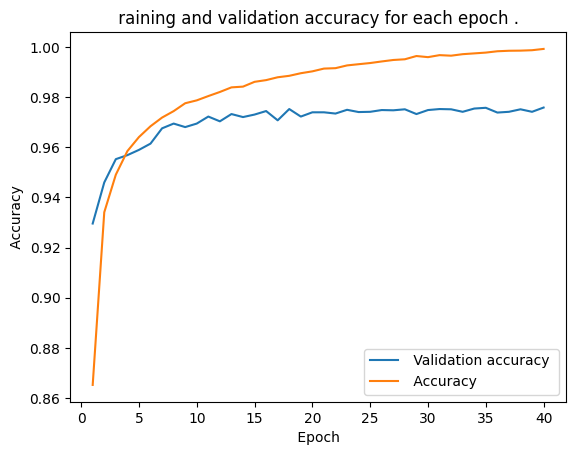

In [201]:
import matplotlib . pyplot as plt
import numpy as np
num_epoch = [i for i in range(1,41)]
accuracy = np . array ( fit_info . history [ "accuracy" ])
val_acc = np . array ( fit_info . history [ "val_accuracy" ])
plt . xlabel ( " Epoch " )
plt . ylabel ( " Accuracy " )
plt . plot ( num_epoch , val_acc , label = " Validation accuracy " ) # the blue line
plt . plot ( num_epoch , accuracy , label = " Accuracy " ) # the orange line
plt . title ( " raining and validation accuracy for each epoch . " )
plt . legend ([ " Validation accuracy " ," Accuracy " ])
plt . show ()

In [205]:
import statistics
from unittest import result
import matplotlib.pyplot as plt


results= [[0.9825000166893005, 1e-06, 0], [0.9811999797821045, 1e-06, 1], [0.9821000099182129, 1e-06, 2], [0.982200026512146, 2e-05, 0], [0.9832000136375427, 2e-05, 1], [0.9819999933242798, 2e-05, 2], [0.9814000129699707, 2.5e-05, 0], [0.9812999963760376, 2.5e-05, 1], [0.9811000227928162, 2.5e-05, 2], [0.982200026512146, 0.0001, 0], [0.9815000295639038, 0.0001, 1], [0.9804999828338623, 0.0001, 2], [0.9836999773979187, 0.001, 0], [0.9807999730110168, 0.001, 1], [0.9815000295639038, 0.001, 2]]
stds=[]
regular_faktor=[0.000001, 0.00002 ,0.000025,0.0001 ,0.001]

#print(results)
for x in range(0,len(results),3):
    temp=[]
    for i in range(3):
        temp.append(results[i][0])
    stds.append(statistics.stdev(temp))

chosen=[result[x][0] for x in range(0,len(results),3)]
#print(regular_faktor)
#print(stds)
#print(chosen)
plt.plot(regular_faktor, chosen, label="Validation accuracy")
plt.plot(regular_faktor, [chosen[i]-stds[i] for i in range(len(stds))], label="Lower", c='r', ls='--')
plt.plot(regular_faktor, [chosen[i]+stds[i] for i in range(len(stds))], label="Upper", c='r', ls='--')
plt.xlabel('Regularization regular_faktor')
plt.ylabel('Accuracy')
plt.title('Accuracy as a function of regularization regular_faktor')

TypeError: 'module' object is not subscriptable

In [ ]:
###2D regularization to not overfitting the network 

# TODO: l2 regularization with 5 different reg factor.
## Define model #
from tensorflow.keras import regularizers


from tensorflow.keras import regularizers
regular_faktor=[0.000001, 0.00002 ,0.000025,0.0001 ,0.001]
result = []
epochs = 40


for i in regular_faktor:
    for j in range(3):
        print(i)        
        model = Sequential()
        model.add(Flatten())                                      #layer_1
        model.add(Dense(500, activation = 'relu',))                 #layer_2 act_funk: relu
        model.add(Dense(300, activation = 'relu',))                 #layer_3 act_funk: relu
        model.add(Dense(num_classes, activation='softmax'))       #layer_4 act_funk: Softma interpret as probebilities

        model.compile(loss=keras.losses.categorical_crossentropy,
                        optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1),  #loss_funk: categorical_crossentropy
                metrics=['accuracy'],)

        fit_info = model.fit(x_train, y_train,
                batch_size=batch_size,
                epochs=epochs,
                verbose=0,
                validation_data=(x_test, y_test))
        score = model.evaluate(x_test, y_test, verbose=0)

        print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))
        result.append([score[1],i,j])

print(result)

1e-06
Test loss: 0.06738724559545517, Test accuracy 0.9805999994277954
1e-06
Test loss: 0.06763258576393127, Test accuracy 0.9821000099182129
1e-06
Test loss: 0.06822921335697174, Test accuracy 0.9824000000953674
2e-05
Test loss: 0.06340266019105911, Test accuracy 0.9821000099182129
2e-05
Test loss: 0.06515438854694366, Test accuracy 0.9815000295639038
2e-05
Test loss: 0.06436147540807724, Test accuracy 0.9824000000953674
2.5e-05
Test loss: 0.06544415652751923, Test accuracy 0.9821000099182129
2.5e-05
Test loss: 0.06641588360071182, Test accuracy 0.9807999730110168
2.5e-05
Test loss: 0.0697811022400856, Test accuracy 0.9811000227928162
0.0001
Test loss: 0.06555920839309692, Test accuracy 0.9825000166893005
0.0001
Test loss: 0.06468337774276733, Test accuracy 0.9819999933242798
0.0001
Test loss: 0.06557376682758331, Test accuracy 0.9819999933242798
0.001
Test loss: 0.0682440996170044, Test accuracy 0.9810000061988831
0.001
Test loss: 0.06547078490257263, Test accuracy 0.9825999736785889

In [44]:
import statistics
import matplotlib.pyplot as plt

stds=[]
regular_faktor=[0.000001, 0.00002 ,0.000025,0.0001 ,0.001]

#print(results)
for x in range(0,len(result),3):
    temp=[]
    for i in range(3):
        temp.append(result[i][0])
    stds.append(statistics.stdev(temp))

chosen=[result[x][0] for x in range(0,len(result),3)]
#print(factors)
#print(stds)
#print(chosen)
plt.plot(regular_faktor, chosen, label="Validation accuracy")
plt.plot(regular_faktor, [chosen[i]-stds[i] for i in range(len(stds))], label="Lower", c='r', ls='--')
plt.plot(regular_faktor, [chosen[i]+stds[i] for i in range(len(stds))], label="Upper", c='r', ls='--')
plt.xlabel('Regularization factors')
plt.ylabel('Accuracy')
plt.title('Accuracy as a function of regularization factors')

NameError: name 'result' is not defined

In [ ]:
stds

[0.0009643674940093659,
 0.0009643674940093659,
 0.0009643674940093659,
 0.0009643674940093659,
 0.0009643674940093659]

In [10]:
## Define model #
best_model = Sequential()

input_shape_=(28,28,1)   #28X28 pixels and only 1D color

best_model.add(Conv2D(64,(7,7), activation = 'relu',input_shape = input_shape_))
best_model.add(MaxPooling2D(pool_size=(2,2)))   
best_model.add(Conv2D(64,(7,7), activation = 'relu',input_shape = input_shape_ ))
best_model.add(MaxPooling2D(pool_size=(2,2)))   
best_model.add(Flatten())  
best_model.add(Dense(num_classes, activation='softmax'))      


best_model.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1), 
        metrics=['accuracy'],)

fit_info = best_model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(x_test, y_test))
score = best_model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))



Epoch 1/10
469/469 [==============================] - 20s 42ms/step - loss: 0.3047 - accuracy: 0.9085 - val_loss: 0.1050 - val_accuracy: 0.9668
Epoch 2/10
469/469 [==============================] - 18s 37ms/step - loss: 0.0887 - accuracy: 0.9733 - val_loss: 0.0664 - val_accuracy: 0.9794
Epoch 3/10
469/469 [==============================] - 19s 40ms/step - loss: 0.0636 - accuracy: 0.9810 - val_loss: 0.0584 - val_accuracy: 0.9814
Epoch 4/10
469/469 [==============================] - 18s 39ms/step - loss: 0.0505 - accuracy: 0.9846 - val_loss: 0.0525 - val_accuracy: 0.9835
Epoch 5/10
469/469 [==============================] - 19s 41ms/step - loss: 0.0431 - accuracy: 0.9872 - val_loss: 0.0484 - val_accuracy: 0.9846
Epoch 6/10
469/469 [==============================] - 18s 39ms/step - loss: 0.0372 - accuracy: 0.9890 - val_loss: 0.0505 - val_accuracy: 0.9832
Epoch 7/10
469/469 [==============================] - 19s 40ms/step - loss: 0.0328 - accuracy: 0.9902 - val_loss: 0.0356 - val_accuracy:

(None, 10)

### Question 4) Auto-Encoder for denoising


In [4]:
import numpy as np
def salt_and_pepper(input, noise_level=0.5):
    """
    This applies salt and pepper noise to the input tensor - randomly setting bits to 1 or 0.
    Parameters
    ----------
    input : tensor
        The tensor to apply salt and pepper noise to.
    noise_level : float
        The amount of salt and pepper noise to add.
    Returns
    -------
    tensor
        Tensor with salt and pepper noise applied.
    """
    # salt and pepper noise
    a = np.random.binomial(size=input.shape, n=1, p=(1 - noise_level))
    b = np.random.binomial(size=input.shape, n=1, p=0.5)
    c = (a==0) * b
    return input * a + c


#data preparation
flattened_x_train = x_train.reshape(-1,784)
flattened_x_train_seasoned = salt_and_pepper(flattened_x_train, noise_level=0.4)

flattened_x_test = x_test.reshape(-1,784)
flattened_x_test_seasoneed = salt_and_pepper(flattened_x_test, noise_level=0.4)


In [5]:

latent_dim = 96  

input_image = keras.Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_image)
encoded = Dense(latent_dim, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = keras.Model(input_image, decoded)
encoder_only = keras.Model(input_image, encoded)

encoded_input = keras.Input(shape=(latent_dim,))
decoder_layer = Sequential(autoencoder.layers[-2:])
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [6]:
fit_info_AE = autoencoder.fit(flattened_x_train_seasoned, flattened_x_train,
                epochs=32,
                batch_size=64,
                shuffle=True,
                validation_data=(flattened_x_test_seasoneed, flattened_x_test))


Epoch 1/32
938/938 [==============================] - 4s 4ms/step - loss: 0.1915 - val_loss: 0.1525
Epoch 2/32
938/938 [==============================] - 3s 3ms/step - loss: 0.1459 - val_loss: 0.1408
Epoch 3/32
938/938 [==============================] - 3s 3ms/step - loss: 0.1363 - val_loss: 0.1329
Epoch 4/32
938/938 [==============================] - 3s 3ms/step - loss: 0.1315 - val_loss: 0.1293
Epoch 5/32
938/938 [==============================] - 3s 3ms/step - loss: 0.1283 - val_loss: 0.1273
Epoch 6/32
938/938 [==============================] - 3s 3ms/step - loss: 0.1261 - val_loss: 0.1257
Epoch 7/32
938/938 [==============================] - 3s 3ms/step - loss: 0.1246 - val_loss: 0.1248
Epoch 8/32
938/938 [==============================] - 3s 3ms/step - loss: 0.1232 - val_loss: 0.1238
Epoch 9/32
938/938 [==============================] - 3s 3ms/step - loss: 0.1222 - val_loss: 0.1231
Epoch 10/32
938/938 [==============================] - 3s 3ms/step - loss: 0.1214 - val_loss: 0.1225

noise_level:  0.1
1/1 [==============================] - 0s 43ms/step
noise_level:  0.3
1/1 [==============================] - 0s 17ms/step
noise_level:  0.4
1/1 [==============================] - 0s 18ms/step
noise_level:  0.5
1/1 [==============================] - 0s 18ms/step
noise_level:  0.6
1/1 [==============================] - 0s 23ms/step
noise_level:  0.7
1/1 [==============================] - 0s 21ms/step
noise_level:  0.8
1/1 [==============================] - 0s 18ms/step


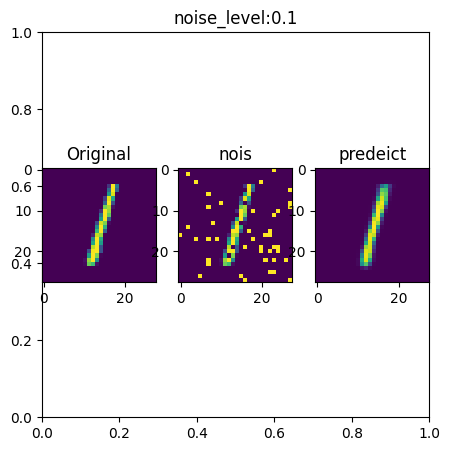

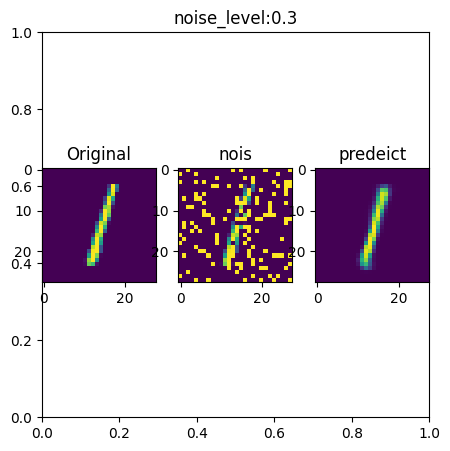

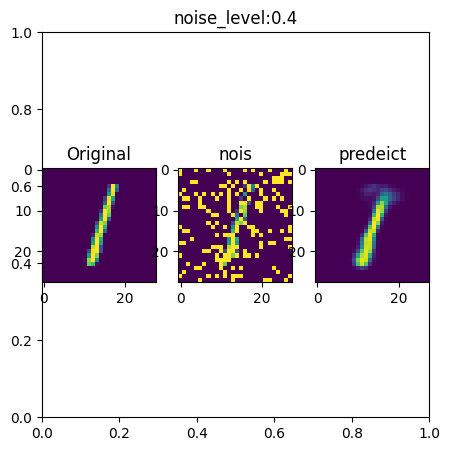

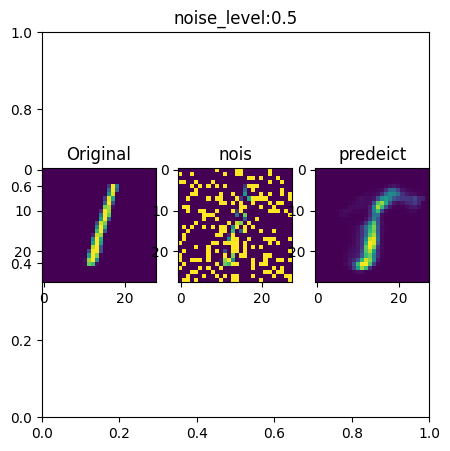

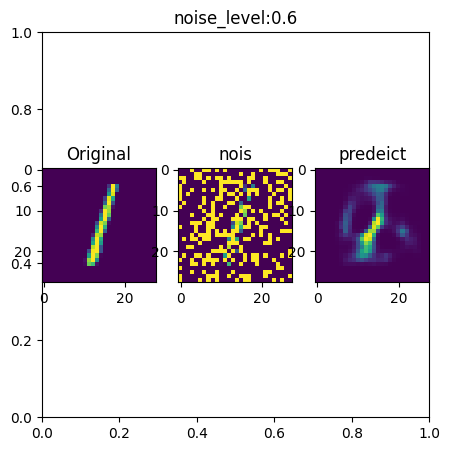

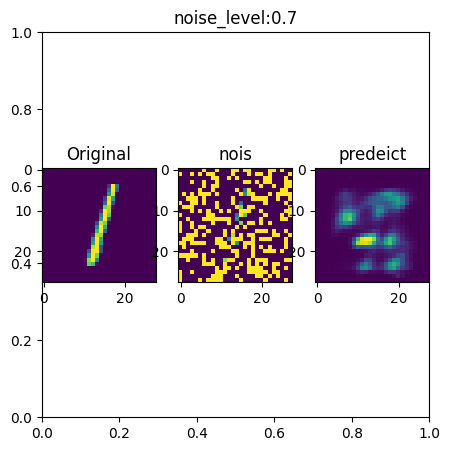

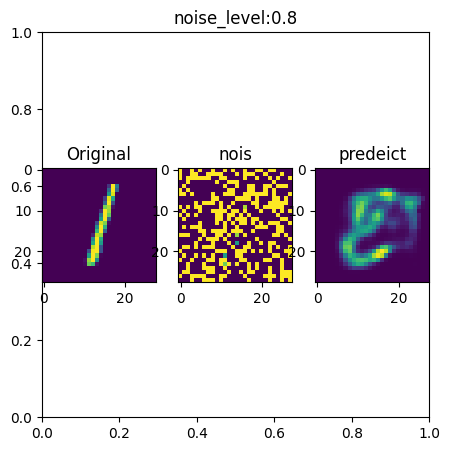

In [7]:
from operator import index


noise_level = []
index_img = 2
for level in [0.1,0.3,0.4,0.5,0.6,0.7,0.8]:
    print("noise_level: ", level)
    noise_level = (salt_and_pepper(flattened_x_test, noise_level = level))


    fig=plt.figure(figsize=(5,5)) 
    plt.title(f"noise_level:{level}")                #original input
    fig.add_subplot(1,3,1) 
    plt.title("Original")
    plt.imshow(np.reshape(flattened_x_test[index_img], (28,28)))

    img = noise_level[index_img]                #original input
    fig.add_subplot(1,3,2) 
    plt.title("nois")
    plt.imshow(np.reshape(img, (28,28)))

    ecoded_img= encoder_only.predict(img[None])[0]
    decoded_img = decoder.predict(ecoded_img[None])[0]                #original input
    fig.add_subplot(1,3,3)    
    plt.title("predeict")             #original input
    plt.imshow(np.reshape(decoded_img, (28,28)))

In [46]:
## Define model #
import numpy as np
list_to_predict = np.array(x_test)
list_to_predict = np.reshape(list_to_predict,(-1,784))

list_to_predict.shape
denoised_data = autoencoder(list_to_predict)
denoised_data= np.reshape(denoised_data,(-1,28,28,1))

score = best_model.evaluate(denoised_data, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))




Test loss: 0.17203013598918915, Test accuracy 0.9577000141143799


In [43]:

noisy_predictions = best_model.predict(noise_level)

from sklearn.metrics import confusion_matrix

# def count_TP(y_true, y_pred):
#     # returns the index of the True value
#     y_trueconv=[np.argmax(y_true[i]) for i in range(len(y_true))]
#     confmat=confusion_matrix(y_trueconv, y_pred)
    
#     sums the diagonals (the true positives)
    # return sum(np.diag(confmat))
# noise0_5=count_TP(y_test, noisy_predictions[0:10000])
# noise0_6=count_TP(y_test, noisy_predictions[10000:20000])
# noise0_7=count_TP(y_test, noisy_predictions[20000:30000])
# noise0_8=count_TP(y_test, noisy_predictions[30000:40000])


# TP_list_seasoned=[noise0_5/10000,noise0_6/10000,noise0_7/10000,noise0_8/10000]
# noise_list=[0.5 ,0.6 ,0.7 ,0.8]



# plt.plot(noise_list,TP_list_seasoned,  label='Seasoned, not denoised')
# plt.legend()

InvalidArgumentError: Graph execution error:

Detected at node 'sequential_1/conv2d/Relu' defined at (most recent call last):
    File "c:\Users\abdul\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\abdul\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\abdul\AppData\Roaming\Python\Python39\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\abdul\AppData\Roaming\Python\Python39\site-packages\traitlets\config\application.py", line 978, in launch_instance
      app.start()
    File "C:\Users\abdul\AppData\Roaming\Python\Python39\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "C:\Users\abdul\AppData\Roaming\Python\Python39\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\abdul\AppData\Local\Programs\Python\Python39\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "c:\Users\abdul\AppData\Local\Programs\Python\Python39\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "c:\Users\abdul\AppData\Local\Programs\Python\Python39\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\abdul\AppData\Roaming\Python\Python39\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\abdul\AppData\Roaming\Python\Python39\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\abdul\AppData\Roaming\Python\Python39\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\abdul\AppData\Roaming\Python\Python39\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "C:\Users\abdul\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "C:\Users\abdul\AppData\Roaming\Python\Python39\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\abdul\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py", line 2885, in run_cell
      result = self._run_cell(
    File "C:\Users\abdul\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py", line 2940, in _run_cell
      return runner(coro)
    File "C:\Users\abdul\AppData\Roaming\Python\Python39\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\abdul\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py", line 3139, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\abdul\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py", line 3318, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\abdul\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py", line 3378, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\abdul\AppData\Local\Temp\ipykernel_22852\1937826707.py", line 3, in <module>
      noisy_predictions= best_model.predict(x_test[0])
    File "c:\Users\abdul\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\abdul\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 2253, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "c:\Users\abdul\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 2041, in predict_function
      return step_function(self, iterator)
    File "c:\Users\abdul\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 2027, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\abdul\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 2015, in run_step
      outputs = model.predict_step(data)
    File "c:\Users\abdul\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
      return self(x, training=False)
    File "c:\Users\abdul\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\abdul\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\abdul\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\abdul\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\abdul\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\abdul\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\sequential.py", line 410, in call
      return super().call(inputs, training=training, mask=mask)
    File "c:\Users\abdul\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\abdul\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\abdul\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\abdul\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\abdul\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\abdul\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\layers\convolutional\base_conv.py", line 314, in call
      return self.activation(outputs)
    File "c:\Users\abdul\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\activations.py", line 317, in relu
      return backend.relu(
    File "c:\Users\abdul\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\backend.py", line 5366, in relu
      x = tf.nn.relu(x)
Node: 'sequential_1/conv2d/Relu'
input must be 4-dimensional[32,784]
	 [[{{node sequential_1/conv2d/Relu}}]] [Op:__inference_predict_function_143467]

1/1 [==============================] - 0s 16ms/step


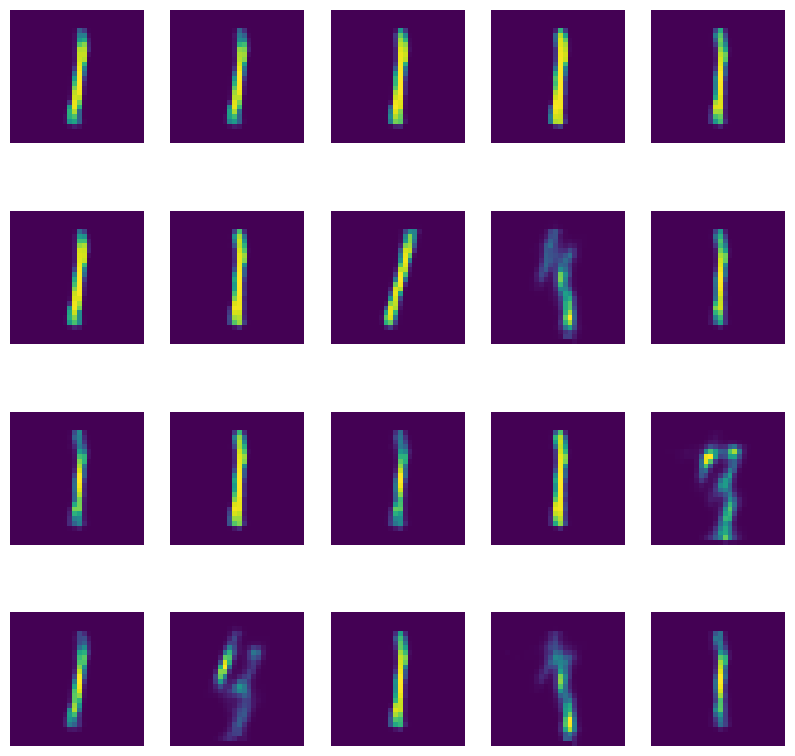

In [21]:
fig=plt.figure(figsize=(10,10))
counter = 1

randomize = np.random.binomial(1, 0.5, size=(20,96))
image = decoder.predict(randomize)
for x in range(0,5):
  image = autoencoder.predict(image)

image = image.reshape(20,28,28)

for level in range(20):
    fig.add_subplot(4,5,counter)
    plt.imshow(image[level])
    plt.axis('off')
    counter += 1

plt.show()